[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



In [ ]:
Categorical - Gender
Quantitative - age
Discrete - Number of siblings
Continuous - Income

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

Text(0.5, 1.0, 'Histogram of CO2 emissions')

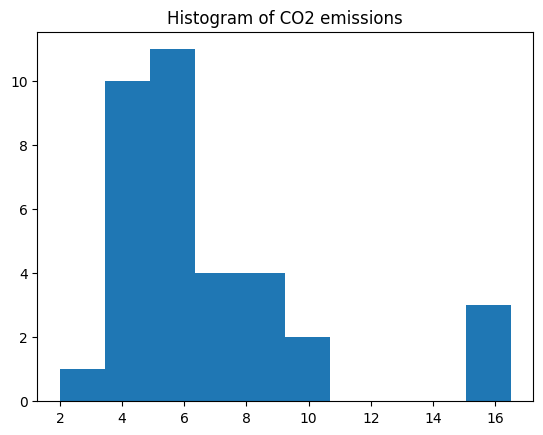

In [3]:
plt.hist(carbon_west['CO2'])
plt.title(f'Histogram of CO2 emissions')


Part b. Find the mean, median, and standard deviation.

In [4]:
mean_value = np.mean(carbon_west['CO2'])
median_value = np.median(carbon_west['CO2'])
standard_dev = np.std(carbon_west['CO2'])

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {standard_dev}")

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [5]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [11]:
filtered_murders = murders[murders['state'] != 'DC']
filtered_mean_value = np.mean(filtered_murders['murder'])
filtered_standard_dev = np.std(filtered_murders['murder'])

print(f"Mean:{mean_value}")
print(f"Stardard Deviation: {standard_dev}")

Mean:4.874
Stardard Deviation: 2.560297638947472


Part b. Find the five-number  summary without D.C.

In [14]:
filtered_murders.describe().loc[['min','25%', '50%', '75%','max']]

,murder
min,1.000
25%,2.625
50%,4.850
75%,6.175
max,12.400


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

The mean is more affected. The range is more affected.

In [23]:
mean_value =np.mean(murders['murder'])
median = np.median(murders['murder'])
murders.describe().loc[['min','25%','50%','75%','max']]

,murder
min,1.00
25%,2.65
50%,5.00
75%,6.45
max,24.20


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [10]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")
houses

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3
...,...,...,...,...,...,...,...
95,96,264.00,1060,0,990,2,2
96,97,294.75,1730,0,3030,3,2
97,98,198.30,1370,0,1580,3,2
98,99,132.60,1560,0,1770,3,2


Part a. Construct a scatterplot between square feet and price of a home.

<Axes: xlabel='size', ylabel='price'>

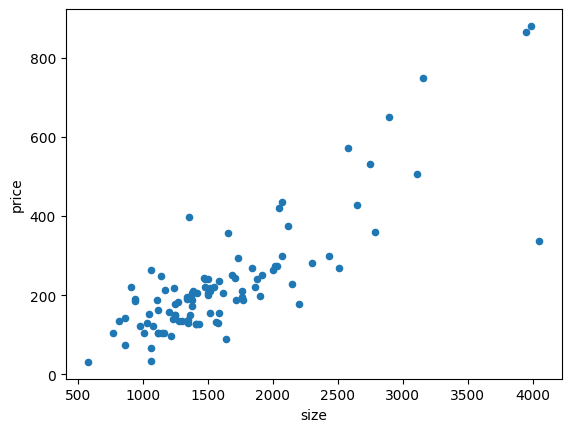

In [11]:
houses.plot(kind='scatter',x='size',y='price')

Part b. Find the correlation between the two variables.

In [35]:
correlation =houses['size'].corr(houses['price'])
print(f"The correlation between size and price is {correlation} ")

The correlation between size and price is 0.8337847885586537 


Part c. Find and plot the regression line on top of the scatterplot.

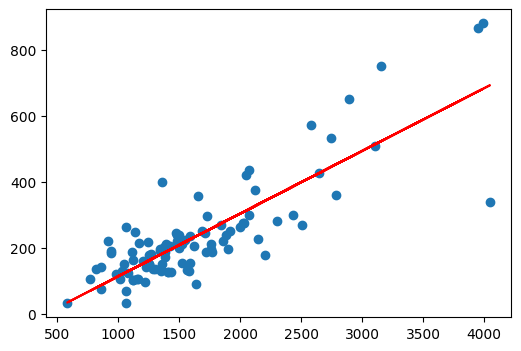

In [39]:
x = houses[['size']]
y = houses['price']
model = LinearRegression()

model.fit(x,y)
slope = model.coef_[0]
intercept = model.intercept_

plt.figure(figsize=(6, 4))
plt.scatter(x, y)

# Plot the regression line
plt.plot(x, model.predict(x), color='red', label='Regression Line')

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

1 indicates that the house is new, 0 indicates that the house is not 

The price is in thousands


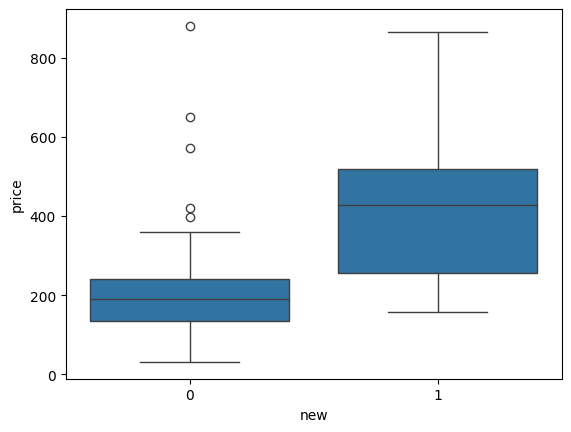

In [22]:
df = pd.DataFrame(houses)
sns.boxplot(x='new',y='price',data=df)
print(f"1 indicates that the house is new, 0 indicates that the house is not \n")
print(f"The price is in thousands")

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

On average, the price for not a new house has a smaller range than a new house. From the graph you can see that the variable of "new" has a large impact on the price of the house. The correlation between size and price is also very large and from the graph you can see that as the size increases, so does the price.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [15]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")

In [16]:
happy

,subject,happiness,marital,gender
0,1,1 1,male,NaN
1,2,1 1,male,NaN
2,3,1 1,male,NaN
3,4,1 1,male,NaN
4,5,1 1,male,NaN
...,...,...,...,...
2137,2138,3,fe,ale
2138,2139,3,fe,ale
2139,2140,3,fe,ale
2140,2141,3,fe,ale


In [20]:
cont_table = pd.crosstab(happy['marital'],happy['happiness'])
cont_table

happiness,1,1 1,1 2,1 3,2,2 1,2 2,2 3,3,3 1,3 2,3 3
marital,,,,,,,,,,,,
fe,348,0,0,0,642,0,0,0,153,0,0,0
fem,0,5,0,0,0,0,0,0,0,0,0,0
mal,0,107,33,56,0,229,114,210,0,33,45,68
male,0,99,0,0,0,0,0,0,0,0,0,0
